In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

In [15]:
p = 1
dt = 0.001
p_bd = p * dt

In [34]:
def Poisson(l, n):
    return l**n * np.exp(-l) / factorial(n)

In [24]:
nitr = 1000
vals = np.zeros(nitr, dtype=np.int)
for n in range(nitr):
    for i in range(int(1/dt)):
        p_r = np.random.uniform()
        if p_r < p_bd:
            vals[n] += 1

In [36]:
# find 
nmax = max(vals)
ns = np.zeros(nmax+1)
for n in range(nmax+1):
    ns[n] = sum(vals == n)
ps = ns / sum(ns)
# ideal
ps_ideal = np.zeros(nmax+1)
for n in range(nmax+1):
    ps_ideal[n] = Poisson(p*1, n)

[]

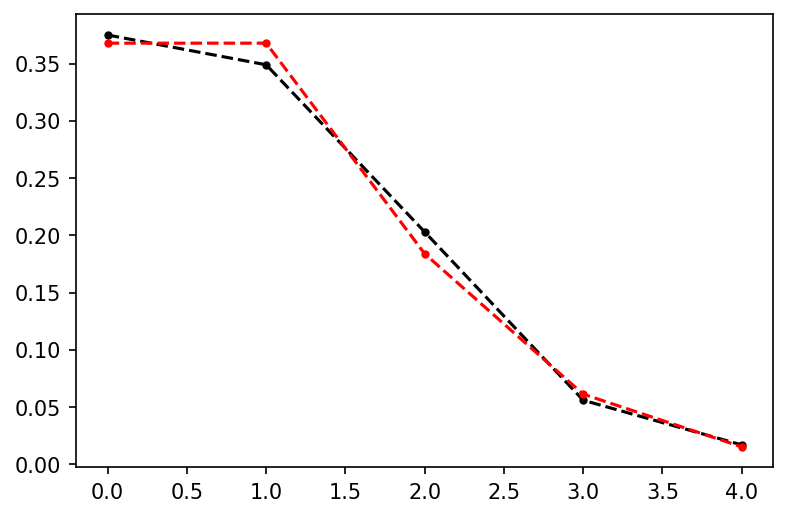

In [38]:
plt.figure(dpi=150)
plt.plot(range(nmax+1), ps, 'k.--')
plt.plot(range(nmax+1), ps_ideal, 'r.--')
plt.plot()

In [1]:
# fft example

In [2]:
dt = 0.001
tmax = 300
t = np.arange(0, tmax+dt/2, dt)
srate = 1/dt

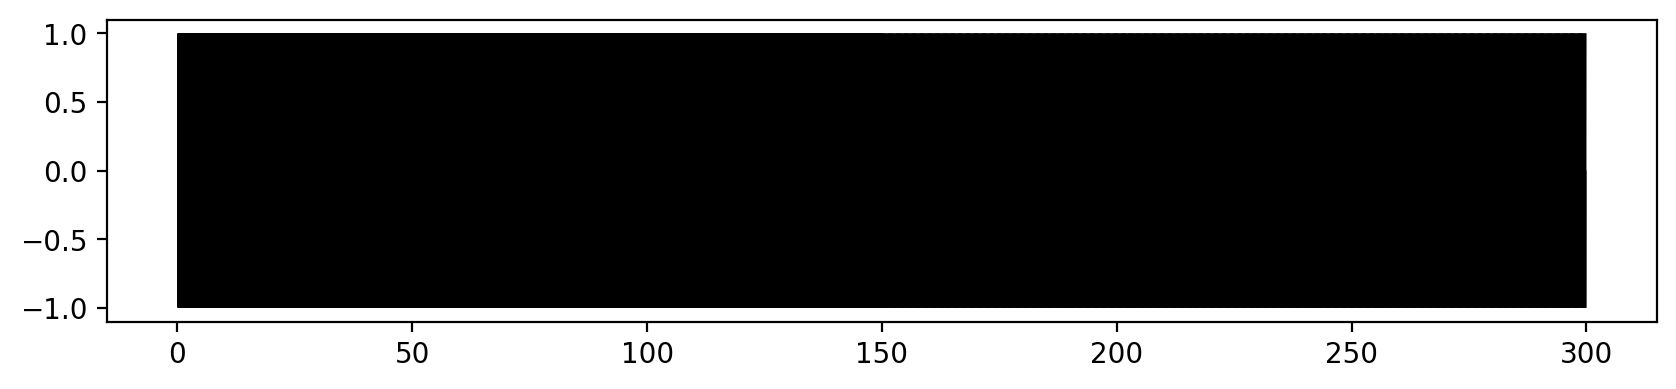

In [3]:
y = np.zeros(t.shape)
y[t < 150] = np.sin(2*np.pi*60*t[t < 150])
y[t >= 150] = np.sin(2*np.pi*10*t[t >= 150])

plt.figure(dpi=200, figsize=(10, 2))
plt.plot(t, y, 'k', lw=0.1)
plt.show()

In [22]:
def getSTFFT(x, fs, wbin=1000, mbin=10):
    freq = np.fft.fftfreq(wbin, 1/fs)[:(wbin//2)]
    ids = np.arange(wbin//2, len(x)-wbin//2, mbin)
    xfft = np.zeros([len(freq), len(ids)-1])
    for i in range(len(ids)-1):
        x_tmp = x[ids[i]-wbin//2:ids[i]+wbin//2]
        y = np.fft.fft(x_tmp)
        xfft[:, i] = abs(y[:(wbin//2)])
    ids_mid = (ids[2:] + ids[1:-1])//2
    t = ids_mid/fs
    return t, freq, xfft

In [23]:
t, f, xfft = getSTFFT(y, 1/dt)

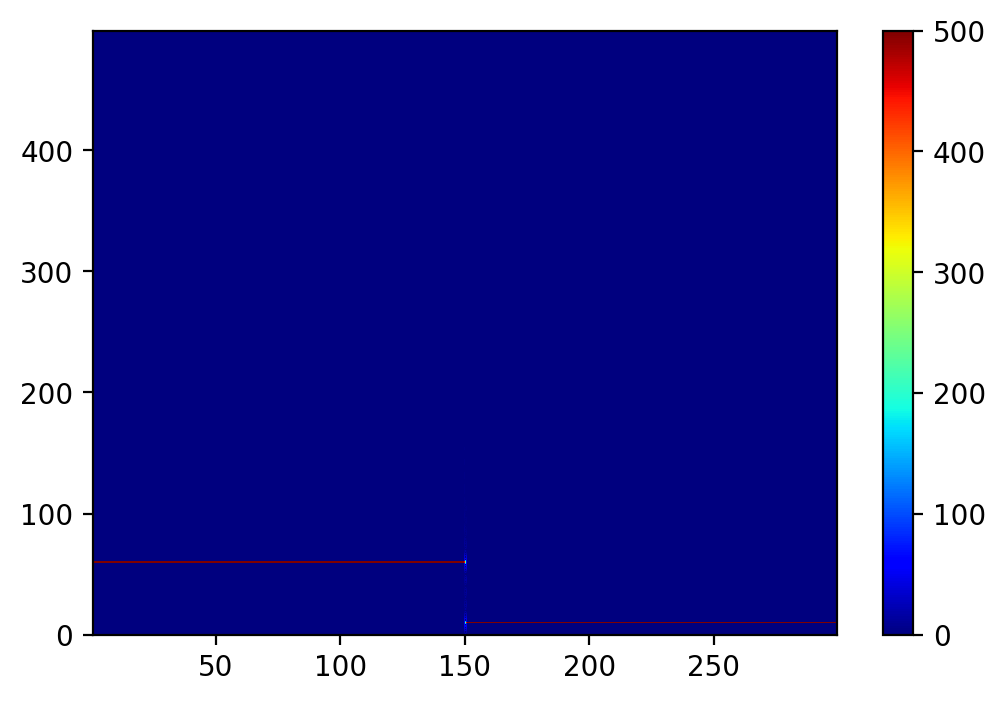

In [27]:
plt.figure(dpi=200)
plt.imshow(xfft, aspect='auto', cmap='jet', extent=(t[0], t[-1], f[0], f[-1]), origin='lower')
plt.colorbar()
plt.show()